<a href="https://colab.research.google.com/github/HJoonKwon/ml_fundamentals/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression 
- Supervised Learning Algorithm
- For Regression Problems
- Minimize MSE(Mean Squared Error)
  - Gradient Descent
  - Newton's method & Hessian Matrix 
- Equal to the linear least-square algorithm

### How does it work?
- Define a hypothesis function h(θ) to predict regression output given input X 
$$ h_{\theta}(X) = θ^TX $$
- Define the cost function J, and find θ such that the model minimizes the cost function. 
$$ J = \frac{1}{2m} Σ_{i=1}^m (h_{\theta}(X)-y^{(i)})^2$$
$$ \theta^* = argmin_{\theta} J(\theta)$$
- We can update θ in two ways
  1. Gradient Descent to update θ iteratively using the gradient of J with respect to θ. 
  2. Newton's method to find the global(==local) minimum of the cost function J with respect to Θ. 

  #### 1) Gradient Descent 
  - α : learning rate 
  - For j-th element of θ
  $$ \theta_j  := \theta_j - \alpha \frac{∂}{∂θ_j}J(θ)$$

  #### 2) Newton's method

  $$ \theta := \theta - H^{-1}∇_{\theta}J(\theta) $$
  $$ H_{ij} =  \frac{∂^2 J(\theta)}{∂θ_i ∂θ_j}$$

In [18]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes

### 0) Define helper functions 

In [13]:
def normalize(data: np.ndarray):
  data = (data - np.mean(data, axis=0))/np.std(data, axis=0)
  return data 

### 1) Prepare for dataset

In [39]:
data = load_diabetes() 
print(data.keys())
print(data['feature_names'])
print(data['data'].shape)
print(data['target'].shape)
print(data['data'][0])

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
(442, 10)
(442,)
[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]


In [121]:
X = data['data']
y = data['target']
X, y = normalize(X), normalize(y)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
train_y = train_y[:, None]
test_y = test_y[:, None]

print(train_X.shape)
print(test_X.shape)
print(X[0])
print(y[0])

(353, 10)
(89, 10)
[ 0.80050009  1.06548848  1.29708846  0.45983993 -0.92974581 -0.73206462
 -0.91245053 -0.05449919  0.41855058 -0.37098854]
-0.014719475152121254


### 2) Visulize some part of data 

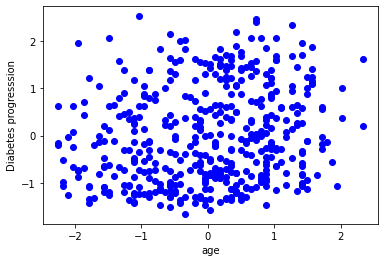

In [91]:
plt.xlabel(data['feature_names'][0])
plt.ylabel('Diabetes progresssion')
plt.plot(X[:, 0], y, 'bo')

### 3) Implement Linear Regression algorithm  

In [139]:
class LinearRegressor():

  def __init__(self):
    self.theta: np.ndarray
    self.test_X: np.ndarray
    self.test_y: np.ndarray 

  def fit(self, X, y, lr, num_epochs):
    self._initialize_theta(X)
    theta, train_costs, test_costs = self._gradient_descent(X, y, lr, num_epochs)
    return theta, train_costs, test_costs 
  
  def predict(self, X_batch):
    preds = [] 
    for X in X_batch:
      h = self._hypothesis(X, self.theta)
      preds.append(h)
    return preds 
  
  def enable_test(self, X, y):
    self.test_X = X
    self.test_y = y 
  
  def _initialize_theta(self, X):
    self.theta = np.zeros((X.shape[1], 1))

  def _cost(self, X, y, theta):
    h = self._hypothesis(X, theta)
    J = 1/(2*X.shape[0]) * np.linalg.norm(h-y, ord=2) ** 2
    return J 
  
  def _hypothesis(self, X, theta):
    h = X @ theta 
    return h 
  
  def _gradient_descent(self, X, y, lr, num_epochs):
    
    train_costs = [] 
    test_costs = [] 
    num_samples = X.shape[0]
    for _ in range(num_epochs):
      h = self._hypothesis(X, self.theta)
      dJdtheta = 1/num_samples * X.T @ (h-y)
      self.theta -= lr * dJdtheta
      train_costs.append(self._cost(X, y, self.theta))

      if test_X.shape[0] > 0:
        test_costs.append(self._cost(self.test_X, self.test_y, self.theta))
    
    return self.theta, train_costs, test_costs 


### 4) Test the algorithm 

In [140]:
# For training dataset 
num_epochs = 30
learning_rate = 0.1
linear_regressor = LinearRegressor()
linear_regressor.enable_test(test_X, test_y)
theta, train_costs, test_costs = linear_regressor.fit(train_X, train_y, lr=learning_rate, num_epochs=num_epochs)

Text(0, 0.5, 'J')

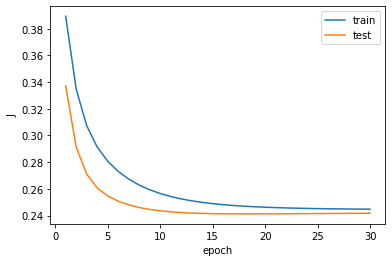

In [137]:
plt.plot(range(1, num_epochs+1), train_costs, label='train')
plt.plot(range(1, num_epochs+1), test_costs, label='test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('J')

## References 
- https://towardsdatascience.com/coding-linear-regression-from-scratch-c42ec079902